In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch 
from    torch import  nn,optim
from    torch.nn import functional as F

C:\Users\Administrator\Anaconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.x=data.x-1897

In [4]:
x_2d=np.zeros([26,1])
x_2d[:,0]=data.x
y_1d=data.y

In [5]:
train_x,test_x =np.zeros([13,1]),np.zeros([13,1])
train_y,test_y=np.zeros([13]),np.zeros([13])

train_x=x_2d[0:26:2,:]
train_y=y_1d[0:26:2].values
test_x=x_2d[1:26:2,:]
test_y=y_1d[1:26:2].values

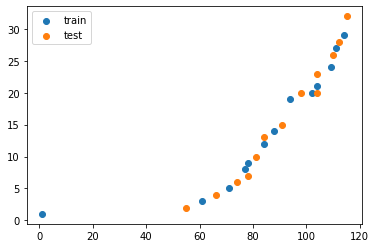

In [6]:
plt.scatter(train_x,train_y,label='train')
plt.scatter(test_x,test_y,label='test')
plt.legend()
plt.show()

In [7]:
a=0
b=0
for i in range(len(data.x)):
    a=a+data.x[i]**2 *data.y[i]
    b=b+data.x[i]**2
result=a/b

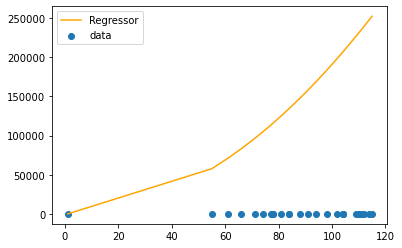

In [8]:
t=data.x
y=result*t**2
plt.plot(t,y,c='orange',label='Regressor')
plt.scatter(data.x,data.y,label='data')
plt.legend()
plt.show()

In [9]:
x=123
y=- 1.639136814e-15*x**10 + 1.059936718e-12*x**9 - 0.0000000002960388319*x**8 + 0.00000004652752046*x**7 - 0.000004472787601*x**6 + 0.0002650337924*x**5 - 0.00900509148*x**4 + 0.126851489*x**3 + 1.240266286*x**2 - 47.08797047*x + 46.72959737

In [10]:
y

13.78173572648101

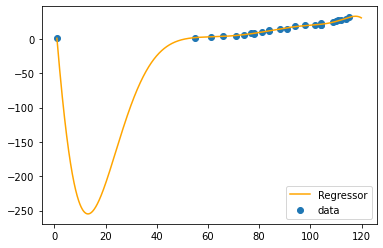

In [11]:
x=np.arange(1,120,0.1)
y=- 1.639136814e-15*x**10 + 1.059936718e-12*x**9 - 0.0000000002960388319*x**8 + 0.00000004652752046*x**7 - 0.000004472787601*x**6 + 0.0002650337924*x**5 - 0.00900509148*x**4 + 0.126851489*x**3 + 1.240266286*x**2 - 47.08797047*x + 46.72959737
plt.plot(x,y,c='orange',label='Regressor')
plt.scatter(data.x,data.y,label='data')
plt.legend()
plt.show()

In [12]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(x_2d, y_1d)
neigh.predict([[123]])

array([29.66666667])

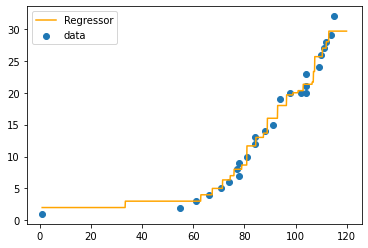

In [13]:
t=np.arange(1,120,0.1)
y=np.arange(1,120,0.1)
for i in range(len(t)):
    y[i]=neigh.predict([[t[i]]])
plt.plot(t,y,c='orange',label='Regressor')
plt.scatter(data.x,data.y,label='data')
plt.legend()
plt.show()

In [14]:
class ResNet18(nn.Module):

    def __init__(self):
        super(ResNet18, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Linear(2, 5)
        )
        self.conv2 = nn.Sequential(
           nn.Linear(5, 10)
        )
        self.conv3 = nn.Sequential(
           nn.Linear(10, 5)
        ) 
        self.conv4 = nn.Sequential(
           nn.Linear(1, 5)
        ) 
     
        self.outlayer = nn.Linear(5, 1)

    def forward(self, x):
        """

        :param x:
        :return:
        """
    
        x = F.relu(self.conv1(x))
        x = x@x.T
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = self.outlayer(x)
        return x

In [15]:
model=ResNet18()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
train=torch.from_numpy(data.x.values).to(torch.float32)
test=torch.from_numpy(data.y.values).to(torch.float32)
for i in range(2000):
    for j in range(25):
        x=torch.zeros(1,2)
        x[0]=train[j]
        model.train()
        optimizer.zero_grad()
        logits = model(x)
        loss_fn=torch.nn.MSELoss(reduce=False, size_average=False)
        loss= loss_fn(logits, test[j])
        loss.backward()
        optimizer.step()

C:\Users\Administrator\Anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
C:\Users\Administrator\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [16]:
x=torch.zeros(1,2)
x[0]=123
model(x)

tensor([[34.0826]], grad_fn=<AddmmBackward0>)

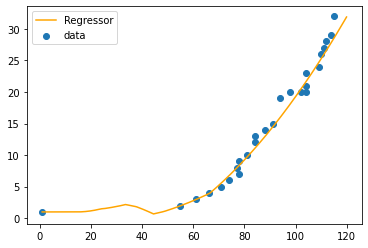

In [17]:
t=np.arange(1,120,0.1)
y=np.arange(1,120,0.1)
for i in range(len(t)):
    x=torch.zeros(1,2)
    x[0]=t[i]
    y[i]=model(x)
plt.plot(t,y,c='orange',label='Regressor')
plt.scatter(data.x,data.y,label='data')
plt.legend()
plt.show()

In [18]:
(34.00+29.67+29.97)/3

31.213333333333335

In [19]:
a=0
b=0
for i in range(len(train_x[:,0])):
    a=a+train_x[i,0]**2 *train_y[i]
    b=b+train_x[i,0]**4
result=a/b

In [20]:
result

0.001956146330816694

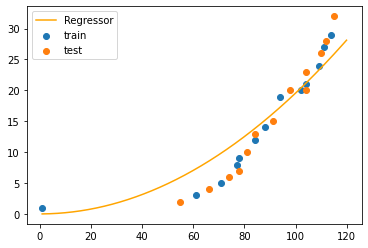

In [21]:
t=np.arange(1,120,0.1)
y=result*t**2
plt.plot(t,y,c='orange',label='Regressor')
plt.scatter(train_x,train_y,label='train')
plt.scatter(test_x,test_y,label='test')
plt.legend()
plt.show()

In [22]:
((test_y-result*g[:,0])**2).sum()

NameError: name 'g' is not defined

In [ ]:
x=123
y=3.975590632e-13*x**10 - 0.0000000003290771782*x**9 + 0.0000001204184953*x**8 - 0.00002556825203*x**7 + 0.003471943435*x**6 - 0.3127761976*x**5 + 18.70628778*x**4 - 717.4565232*x**3 + 16097.80278*x**2 - 165200.0207*x + 149802.2775
 

In [ ]:
x=np.arange(1,120,0.1)
y=3.975590632e-13*x**10 - 0.0000000003290771782*x**9 + 0.0000001204184953*x**8 - 0.00002556825203*x**7 + 0.003471943435*x**6 - 0.3127761976*x**5 + 18.70628778*x**4 - 717.4565232*x**3 + 16097.80278*x**2 - 165200.0207*x + 149802.2775
plt.plot(x,y,c='orange',label='Regressor')
plt.scatter(train_x,train_y,label='train')
plt.scatter(test_x,test_y,label='test')
plt.legend()
plt.show()

In [ ]:
x=test_x[:,0]
y=3.975590632e-13*x**10 - 0.0000000003290771782*x**9 + 0.0000001204184953*x**8 - 0.00002556825203*x**7 + 0.003471943435*x**6 - 0.3127761976*x**5 + 18.70628778*x**4 - 717.4565232*x**3 + 16097.80278*x**2 - 165200.0207*x + 149802.2775


In [ ]:
((y-test_y)**2).sum()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(train_x, train_y)


In [ ]:
t=np.arange(1,120,0.1)
y=np.arange(1,120,0.1)
for i in range(len(t)):
    y[i]=neigh.predict([[t[i]]])
plt.plot(t,y,c='orange',label='Regressor')
plt.scatter(train_x,train_y,label='train')
plt.scatter(test_x,test_y,label='test')
plt.legend()
plt.show()

In [ ]:
t=test_x
y=np.zeros([13,1])
for i in range(len(t)):
    y[i]=neigh.predict([t[i,:]])

In [ ]:
((y-test_y)**2).sum()

In [ ]:
model=ResNet18()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
train=torch.from_numpy(train_x).to(torch.float32)
test=torch.from_numpy(train_y).to(torch.float32)
for i in range(2000):
    for j in range(13):
        x=torch.zeros(1,2)
        x[0]=train[j]
        model.train()
        optimizer.zero_grad()
        logits = model(x)
        loss_fn=torch.nn.MSELoss(reduce=False, size_average=False)
        loss= loss_fn(logits, test[j])
        loss.backward()
        optimizer.step()

In [ ]:
t=np.arange(1,120,0.1)
y=np.arange(1,120,0.1)
for i in range(len(t)):
    x=torch.zeros(1,2)
    x[0]=t[i]
    y[i]=model(x)
plt.plot(t,y,c='orange',label='Regressor')
plt.scatter(train_x,train_y,label='train')
plt.scatter(test_x,test_y,label='test')
plt.legend()
plt.show()

In [ ]:
y=torch.zeros([13,1])
x=torch.zeros(1,2,)
for i in range(len(t)):
    x[0]=test_x[i,0]
    y[i]=model(x)

In [ ]:
((y[:,0]-torch.from_numpy(test_y))**2).sum()

In [ ]:
t=np.arange(1,120,0.1)
y1=result*t**2
y2=np.arange(1,120,0.1)
for i in range(len(t)):
    y2[i]=neigh.predict([[t[i]]])

y3=np.arange(1,120,0.1)

for i in range(len(t)):
    x=torch.zeros(1,2)
    x[0]=t[i]
    y3[i]=model(x)
    
y=(y1+y2+y3)/3

plt.plot(t,y,c='orange',label='Regressor')
plt.scatter(train_x,train_y,label='train')
plt.scatter(test_x,test_y,label='test')
plt.legend()
plt.show()


In [ ]:
y1=result*test_x**2

t=test_x
y2=np.zeros([13,1])
for i in range(len(t)):
    y2[i]=neigh.predict([t[i,:]])
    
y3=torch.zeros([13,1])
y4=y3.numpy()
x=torch.zeros(1,2,)
for i in range(len(t)):
    x[0]=test_x[i,0]
    y3[i]=model(x)

In [ ]:
((((y1+y2+y4)/3)-test_y)**2).sum()